## I. Classification

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [3]:
X_train.shape

(1437, 64)

In [4]:
y_train.shape


(1437,)

In [5]:
X_test.shape

(360, 64)

In [6]:
y_test.shape

(360,)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [14]:
neighbors = np.arange(1,9)
train_acc = np.empty(len(neighbors))
test_acc  = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)
knn_acc = test_acc.max()
knn_acc

0.9888888888888889

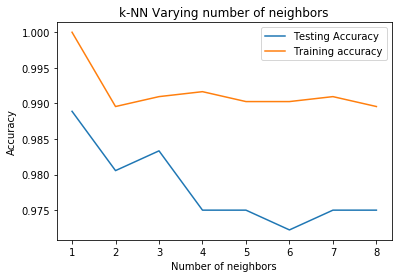

In [15]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_acc, label='Testing Accuracy')
plt.plot(neighbors, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
from sklearn.svm import SVC


In [17]:
# X = digits.data
# y = digits.target

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.9777777777777777

In [19]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        27\n           1       0.94      0.97      0.96        35\n           2       0.97      1.00      0.99        36\n           3       0.97      1.00      0.98        29\n           4       0.97      1.00      0.98        30\n           5       0.97      0.97      0.97        40\n           6       1.00      0.98      0.99        44\n           7       1.00      0.97      0.99        39\n           8       0.97      0.95      0.96        39\n           9       0.97      0.95      0.96        41\n\n    accuracy                           0.98       360\n   macro avg       0.98      0.98      0.98       360\nweighted avg       0.98      0.98      0.98       360\n'

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
Bayes = accuracy_score(y_test, y_pred)
Bayes

0.825

In [22]:
import pandas as pd
import seaborn as sns

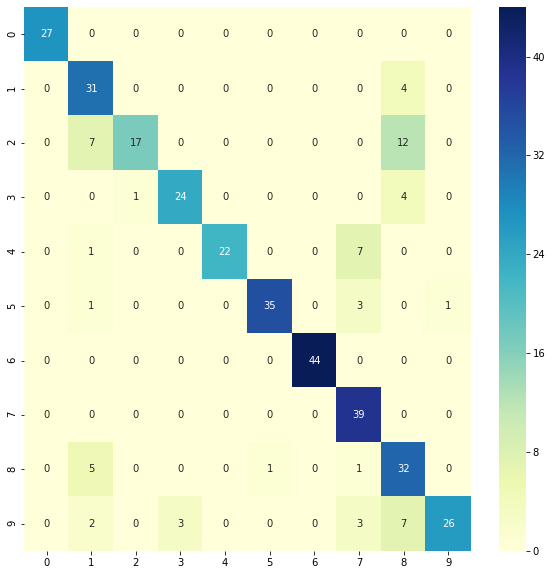

In [23]:
cfs_matrix = confusion_matrix(y_test, y_pred)
corr = pd.DataFrame(cfs_matrix)
# corr = cfs.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu",
           annot=True)

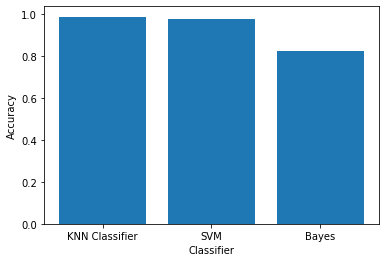

In [24]:
plt.bar(['KNN Classifier','SVM','Bayes'],height=[knn_acc,svm_acc,Bayes])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

## II. Regression

In [25]:
data = pd.read_csv('gapminder.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [26]:
data2 = data.drop(['Region'],axis=1)
data2.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2


In [27]:
import seaborn as sns


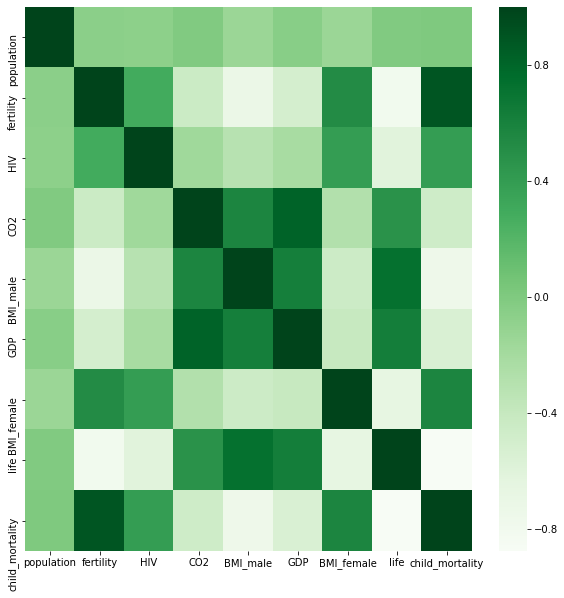

In [28]:
corr = data2.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="Greens")

In [29]:
df1 = pd.DataFrame(data['fertility'])
df2 = pd.DataFrame(data['life'])
data3 = pd.concat([df1,df2],axis=1)
data3.head()

,fertility,life
0,2.73,75.3
1,6.43,58.3
2,2.24,75.5
3,1.40,72.5
4,1.96,81.5


In [30]:
from sklearn.decomposition import PCA as sklearnPCA

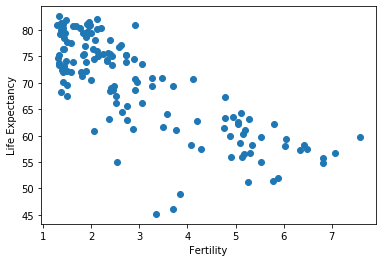

In [31]:
plt.scatter(data3['fertility'], data3['life'])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

plt.show()

In [64]:
X = data3['fertility'].values.reshape(-1,1)
y = data3['life'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
regr = linear_model.LinearRegression()

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
fit_med =regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

cross_val_score(fit_med,X,y,cv=3)

array([0.83699524, 0.87875694, 0.89986165])

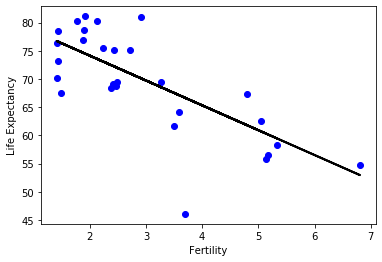

In [73]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'black', linewidth=2)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [78]:
from sklearn import metrics

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.569698628819247
Mean Squared Error: 35.82809507229282
Root Mean Squared Error: 5.985657446955415


In [84]:
X = data[['population','fertility','HIV','CO2','BMI_male','GDP',
          'BMI_female','child_mortality',]].values
y=data['life'].values

In [85]:
import seaborn as seabornInstance 

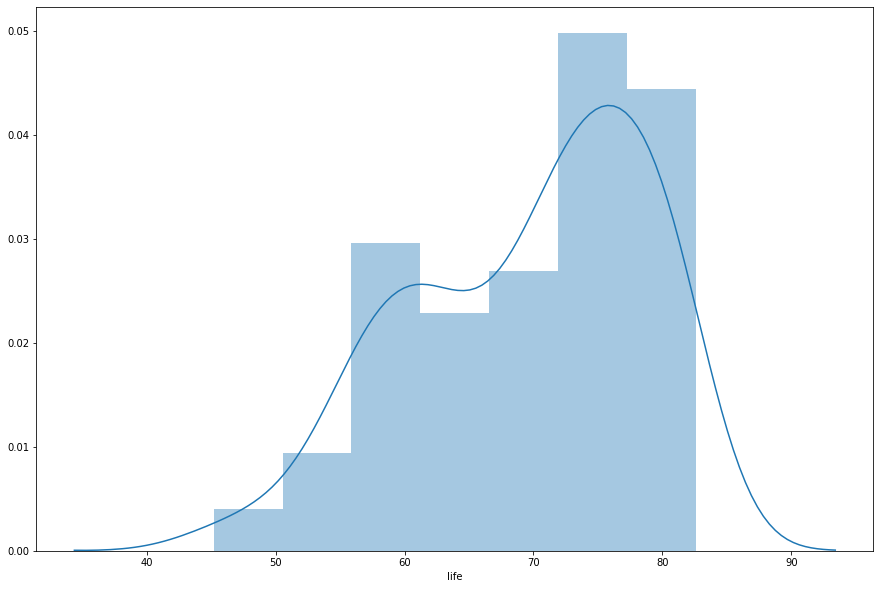

In [87]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['life'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
regressor = LinearRegression()  
fit_med=regressor.fit(X_train, y_train)

In [91]:
y_pred = regressor.predict(X_test)

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9633032403067647
Mean Squared Error: 5.913686531428245
Root Mean Squared Error: 2.4318072562249347


In [99]:
cross_val_score(fit_med,X,y,cv=3)

array([0.83699524, 0.87875694, 0.89986165])

## 2. Logistic Regression

In [103]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds")

492 frauds,  284315 nonfrauds


In [116]:
frauds.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


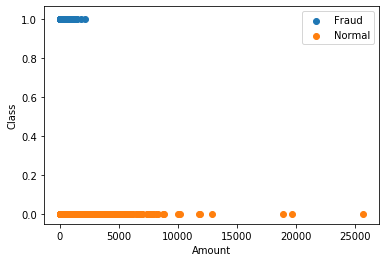

In [129]:
plt.scatter(frauds['Amount'],frauds['Class'], label='Fraud')
plt.scatter(non_frauds['Amount'],non_frauds['Class'], label='Normal')
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Class')

plt.show()

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [133]:

X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values
y=df['Class'].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [135]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[56841    20]
 [   44    57]]


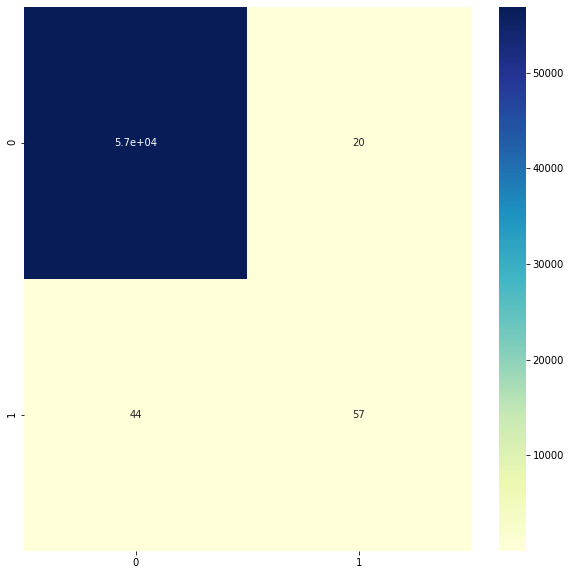

In [141]:
corr = pd.DataFrame(confusion_matrix)
# corr = cfs.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="YlGnBu",
           annot=True)